# Features Notebook

This notebook seems to extract, visualize and help understand the different features that can describe sound bites

In [78]:
# Import the required libraries
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import scipy.fftpack
import math

from sklearn.neural_network import MLPClassifier

import IPython.display as ipd

## Importing and visualising sounds

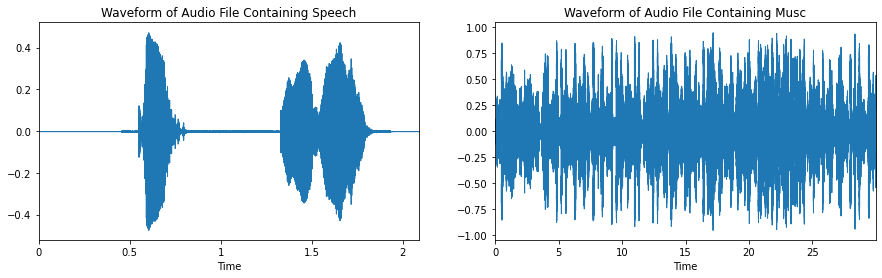

In [28]:
speech_file = "../dataset/Speech/84-121123-0000.flac"
music_file = "../dataset/Music/000002.wav"

# Load the audio as a waveform `y` and store the sampling rate as `sr`
y_speech, sr_speech = librosa.load(speech_file)
y_music, sr_music = librosa.load(music_file)

# Plot the sound clips
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
arr = librosa.display.waveplot(y_speech, sr=sr_speech)
plt.title("Waveform of Audio File Containing Speech");

plt.subplot(1,2,2)
librosa.display.waveplot(y_music, sr=sr_music)
plt.title("Waveform of Audio File Containing Musc");

## Spectogram 

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.

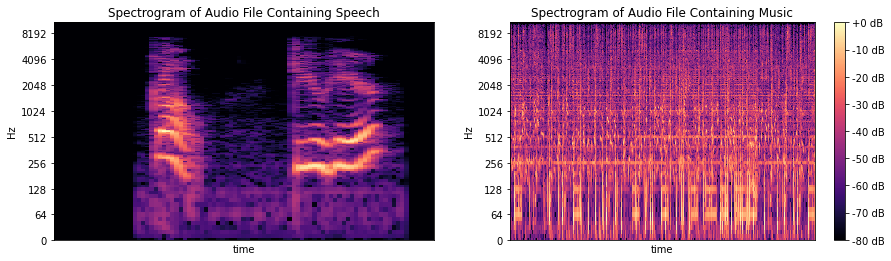

In [40]:
plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
Spec_speech = librosa.amplitude_to_db(np.abs(librosa.stft(y_speech)), ref=np.max)
librosa.display.specshow(Spec_speech, y_axis='log')
plt.title('Spectrogram of Audio File Containing Speech');
plt.xlabel('time');

plt.subplot(1,2,2)
Spec_music = librosa.amplitude_to_db(np.abs(librosa.stft(y_music)), ref=np.max)
librosa.display.specshow(Spec_music, y_axis='log')
plt.title('Spectrogram of Audio File Containing Music');
plt.xlabel('time');

plt.colorbar(format='%+2.0f dB');

## Zero-Crossing Rate

The zero-crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to zero to negative or from negative to zero to positive, and can be used as a key feature to classify percussive sounds

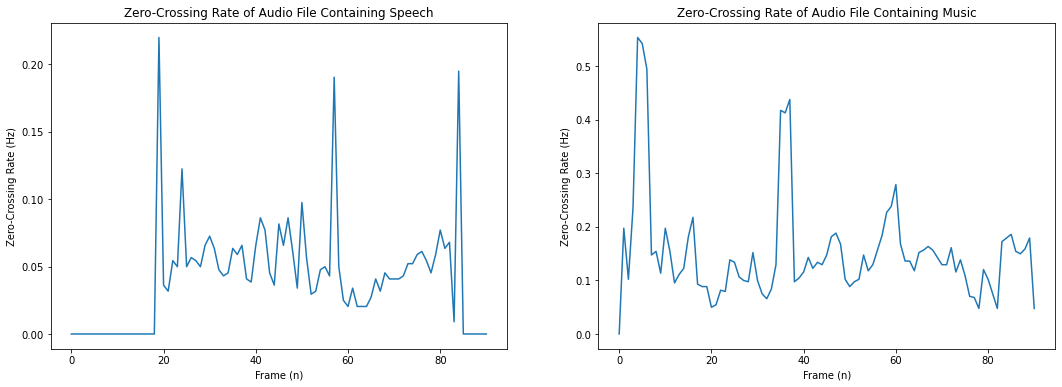

In [64]:
plt.figure(figsize=(18, 6))

# Determine frame length
frame_freq = 50
frame_length = int (sr_speech / frame_freq)

# Get zero crossing rate
speech_crossrate = librosa.feature.zero_crossing_rate(y_speech,frame_length=frame_length)
music_crossrate  = librosa.feature.zero_crossing_rate(y_music[0:y_speech.shape[0]],frame_length=frame_length)

# Display results
plt.subplot(1,2,1)
plt.plot(speech_crossrate[0]);
plt.title('Zero-Crossing Rate of Audio File Containing Speech');
plt.xlabel('Frame (n)');
plt.ylabel('Zero-Crossing Rate (Hz)');

plt.subplot(1,2,2)
plt.plot(music_crossrate[0]);
plt.title('Zero-Crossing Rate of Audio File Containing Music');
plt.xlabel('Frame (n)');
plt.ylabel('Zero-Crossing Rate (Hz)');

### Variance of Zero-Crossing Rate

Allows us to measure distribution of zero-crossing rate. This is done by
- Measuring the local variance of zero-crossing rate  over each second of data (50 frames)
- Measure mean of local variances

In [120]:
# Calculate Local Variance of Zero-Crossing Rate
local_var_zero_crossing_speech = []
local_var_zero_crossing_music = []

end=0
for i in range ( 0 , int( speech_crossrate.size/50) ):
    local_var_zero_crossing_speech.append( np.var(speech_crossrate[0][( 50*i ):( (50-1)*(i+1) )]) )
    local_var_zero_crossing_music.append ( np.var(music_crossrate[0][( 50*i ):( (50-1)*(i+1) )]) )
    # print(np.var(speech_crossrate[( 50*i ):( (50-1)*(i+1) )]))
    # print("{} {}".format(50*i, (50-1)*(i+1)))
    end = i+1
# print("{} {}".format(50*end, speech_crossrate.size-1))
local_var_zero_crossing_speech.append( np.var(speech_crossrate[0][( 50*end ): speech_crossrate.size ]) )
local_var_zero_crossing_music.append( np.var(speech_crossrate[0][( 50*end ): music_crossrate.size ]) )

# Calculate Average Variance of Zero-Crossing Rate
avg_var_zero_crossing_speech = np.average(local_var_zero_crossing_speech)
avg_var_zero_crossing_music = np.average(local_var_zero_crossing_music)

# Print Results
print("Local Variances of Speech Zero-Crossing rate is {} with an average of {} ".format(local_var_zero_crossing_speech, avg_var_zero_crossing_speech ))
print("Local Variances of Music Zero-Crossing rate is {} with an average of {} ".format(local_var_zero_crossing_music, avg_var_zero_crossing_music ))

print()

print('Total variance of Speech Zero-Crossing rate : ', np.var(speech_crossrate))
print('Total variance of Music Zero-Crossing rate : ',np.var(music_crossrate))

Local Variances of Speech Zero-Crossing rate is [0.0017098359852371079, 0.00162757198026477] with an average of 0.001668703982750939 
Local Variances of Music Zero-Crossing rate is [0.01575306912449802, 0.00162757198026477] with an average of 0.008690320552381395 

Total variance of Speech Zero-Crossing rate :  0.0016619451836463062
Total variance of Music Zero-Crossing rate :  0.009790589131004371
